# Linear Regression with Regularization
by Cesar Malenab

### Declarations

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time
import shap

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from yellowbrick.regressor import ResidualsPlot, PredictionError

from joblib import dump, load

shap.initjs()

pd.set_option('display.max_columns', None)

### Data Import

In [3]:
df = pd.read_csv('data/fire_resistance.csv')

In [4]:
df = df.set_index('beam_name')

In [5]:
df.head()

,length,concrete_area,concrete_cover,steel_area,frp_area,insulation_thickness,insulation_depth,conc_strength,steel_strength,frp_strength,glass_transition,thermal_conductivity,specific_heat,total_load,load_ratio,fire_resistance
beam_name,,,,,,,,,,,,,,,,
B1,3000,60000,25,402.1,0.0,0.0,0.0,47.6,591,0,0,0.000,0,61.2,44.8,90
B2,3000,60000,25,402.1,0.0,0.0,0.0,45.5,591,0,0,0.000,0,61.2,44.8,90
B3,3000,60000,25,402.1,120.0,25.0,0.0,44.4,591,2800,52,0.175,730800,81.2,38.4,76
B4,3000,60000,25,402.1,120.0,40.0,80.0,47.4,591,2800,52,0.175,730800,81.2,38.4,90
B5,3000,60000,25,402.1,120.0,25.0,80.0,45.1,591,2800,52,0.175,730800,81.2,38.4,92


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21434 entries, B1 to I5_ B4488
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   length                21434 non-null  int64  
 1   concrete_area         21434 non-null  int64  
 2   concrete_cover        21434 non-null  int64  
 3   steel_area            21434 non-null  float64
 4   frp_area              21434 non-null  float64
 5   insulation_thickness  21434 non-null  float64
 6   insulation_depth      21434 non-null  float64
 7   conc_strength         21434 non-null  float64
 8   steel_strength        21434 non-null  int64  
 9   frp_strength          21434 non-null  int64  
 10  glass_transition      21434 non-null  int64  
 11  thermal_conductivity  21434 non-null  float64
 12  specific_heat         21434 non-null  int64  
 13  total_load            21434 non-null  float64
 14  load_ratio            21434 non-null  float64
 15  fire_resistance    

### Train-Test Split

In [7]:
X = df.drop('fire_resistance', axis=1)
y = df['fire_resistance']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18218, 15)
(18218,)
(3216, 15)
(3216,)


### Scaling the features

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression - ElasticNet (L1 and L2 Regularization)

### Random search of best parameters

In [74]:
model = ElasticNet()

param_grid = {
    'alpha': [0.1, 1, 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]
}

In [75]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    verbose=2
)

In [76]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1

[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [77]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [78]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083649,0.002143,0.000901,3.003283e-04,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-1848.237065,-1911.193701,-1924.234212,-1882.204159,-1817.504623,-1829.232475,-1980.350844,-1903.663167,-1933.573973,-1775.111090,-1880.530531,59.098008,8
1,0.081674,0.001626,0.000801,4.004601e-04,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-1796.991039,-1866.075618,-1881.686298,-1837.078327,-1776.745518,-1791.079665,-1936.899470,-1875.391716,-1895.889443,-1726.834429,-1838.467152,61.007362,5
2,0.092984,0.001376,0.001001,3.099442e-07,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-1771.095024,-1841.933690,-1860.683522,-1812.808461,-1758.350241,-1774.012113,-1915.560875,-1863.747663,-1877.390283,-1702.782408,-1817.836428,62.070739,4
3,0.113560,0.003438,0.000901,3.003599e-04,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-1743.515564,-1813.362867,-1840.342774,-1784.718572,-1744.556154,-1761.621749,-1894.953743,-1858.610003,-1859.382955,-1678.297352,-1797.936173,63.658190,3
4,0.116309,0.001233,0.001001,1.886522e-06,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-1740.576769,-1809.677206,-1838.783623,-1781.323556,-1744.607096,-1761.803629,-1893.358549,-1859.995995,-1857.956250,-1676.012162,-1796.409484,63.971412,2
5,0.118428,0.002058,0.001001,5.119064e-07,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-1739.959529,-1808.835815,-1838.525244,-1780.572991,-1744.785780,-1762.007527,-1893.091285,-1860.501448,-1857.712711,-1675.569398,-1796.156173,64.053857,1
6,0.024923,0.001138,0.000801,4.003646e-04,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-2635.147065,-2607.044180,-2613.421817,-2538.958934,-2565.448046,-2530.087808,-2679.852228,-2500.527338,-2592.084256,-2535.899015,-2579.847069,52.587093,16
7,0.033030,0.001266,0.000901,3.002645e-04,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-2324.198955,-2323.887060,-2335.026975,-2271.070832,-2257.322326,-2241.110074,-2399.716894,-2247.055472,-2321.869636,-2234.269062,-2295.552729,50.849790,13
8,0.028626,0.000491,0.000901,3.002568e-04,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-2142.422718,-2164.838188,-2175.545524,-2120.380494,-2081.020974,-2077.405166,-2239.014370,-2105.946794,-2171.090222,-2058.166804,-2133.583125,52.804196,10
9,0.073367,0.001848,0.000801,4.004360e-04,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-1887.587847,-1959.861247,-1965.152684,-1918.923631,-1850.608592,-1860.277377,-2013.409084,-1927.470280,-1975.835205,-1806.190264,-1916.531621,61.475475,9


In [79]:
y_pred = grid_model.predict(X_test)

In [80]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [81]:
RMSE

43.93055301604659

In [82]:
df['fire_resistance'].mean()

101.90855649902025

In [83]:
MAE = mean_absolute_error(y_test, y_pred)

In [84]:
MAE

33.6923971632561

### Training on best parameters of ElasticNet

In [67]:
model = ElasticNet(alpha=0.1,
                  l1_ratio=1)

In [68]:
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=1)

In [69]:
y_pred = model.predict(X_test)

In [70]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")
print(f"r2: {r2}")

MAE: 33.767348605931794
RMSE: 44.098584061503146
r2: 0.6472764999578244


### Coefficients of Linear Regression

In [82]:
pd.DataFrame(data=grid_model.best_estimator_.coef_, index=df.columns[:-1], columns=['coefficient'])\
.sort_values('coefficient')

,coefficient
load_ratio,-172.723154
total_load,-139.583426
length,-69.086178
frp_area,-63.298929
thermal_conductivity,-34.739120
specific_heat,-21.101311
conc_strength,-17.323842
frp_strength,-8.645141
glass_transition,0.000000
steel_strength,0.384596


In [81]:
model.coef_

array([ -69.08617837,   19.68325038,   52.41742189,  174.4226408 ,
        -63.298929  ,   56.30949635,  226.51922392,  -17.32384178,
          0.38459633,   -8.64514112,    0.        ,  -34.73912023,
        -21.10131095, -139.58342608, -172.72315414])

### Prediction Error

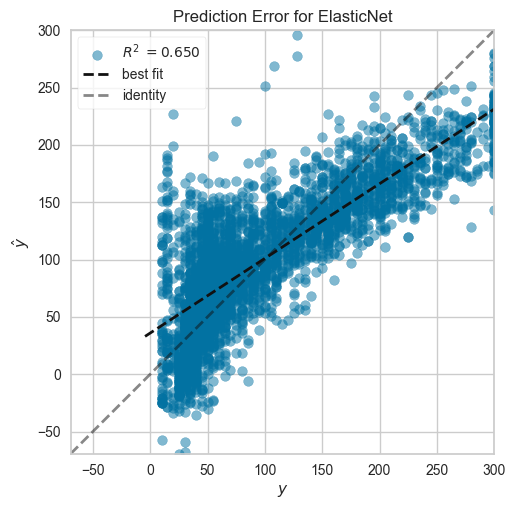

<Axes: title={'center': 'Prediction Error for ElasticNet'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [94]:
pe_visualizer = PredictionError(model, alpha=0.5, shared_limits=True)

pe_visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
pe_visualizer.score(X_test, y_test)  # Evaluate the model on the test data
pe_visualizer.show()  

### Residual Plots

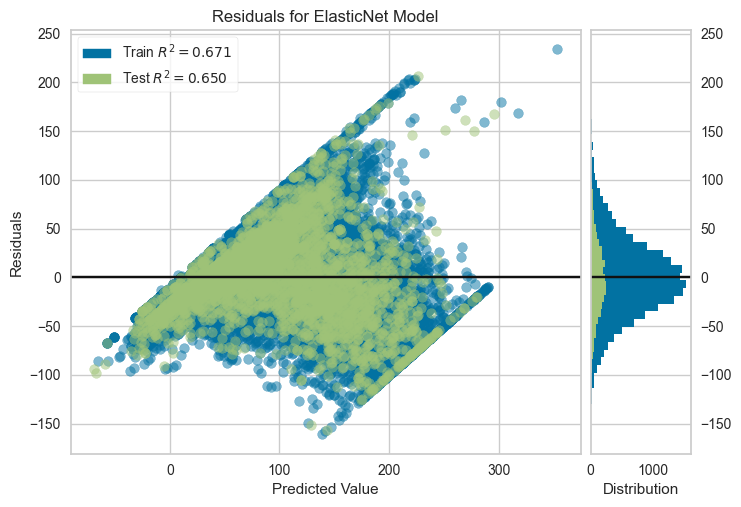

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [28]:
rp_visualizer = ResidualsPlot(model, train_alpha=0.5, test_alpha=0.5)

rp_visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
rp_visualizer.score(X_test, y_test)  # Evaluate the model on the test data
rp_visualizer.show()  

### Using ElasticnetCV:

In [29]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],
                            eps=0.001,
                            n_alphas=100,
                            max_iter=1000000)

In [30]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [31]:
elastic_model.l1_ratio_

1.0

In [32]:
elastic_model.alpha_

0.03799946363649537

* best alpha obtained but not much improvement.

In [33]:
test_prediction = elastic_model.predict(X_test)

In [34]:
MAE = mean_absolute_error(y_test, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, test_prediction))

In [35]:
RMSE

43.92900093737853

In [36]:
MAE

33.699159779818046

### Using SGDRegressor:

In [37]:
model = SGDRegressor()

param_grid = {
    'loss':['squared_error'],
    'penalty':['elasticnet'],
    'alpha': [0.01, 0.1, 1, 5],
    'l1_ratio': [0.1, 0.5, 0.7, 1],
    'learning_rate': ['constant'],
    'eta0':[0.1, 0.01, 0.001]
}

In [38]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    verbose=2
)

In [39]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END alpha=0.01, eta0=0.1, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.1, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.1, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.1, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.1, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.1, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.1, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.1, l1_ratio=0

[CV] END alpha=0.01, eta0=0.01, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.01, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.01, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.01, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.01, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.01, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.01, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.01, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; tot

[CV] END alpha=0.1, eta0=0.1, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; tot

[CV] END alpha=0.1, eta0=0.001, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.001, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.001, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.001, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.001, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.001, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.001, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.001, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty

[CV] END alpha=1, eta0=0.1, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.1, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.01, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.01, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.01, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.01, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.01, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.01, l1_ratio=0.1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0

[CV] END alpha=1, eta0=0.001, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.001, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.001, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.001, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.001, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.001, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.001, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=1, eta0=0.001, l1_ratio=1, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0

[CV] END alpha=5, eta0=0.01, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=5, eta0=0.01, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=5, eta0=0.01, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=5, eta0=0.01, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=5, eta0=0.01, l1_ratio=0.5, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=5, eta0=0.01, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=5, eta0=0.01, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=   0.0s
[CV] END alpha=5, eta0=0.01, l1_ratio=0.7, learning_rate=constant, loss=squared_error, penalty=elasticnet; total time=

GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'alpha': [0.01, 0.1, 1, 5], 'eta0': [0.1, 0.01, 0.001],
                         'l1_ratio': [0.1, 0.5, 0.7, 1],
                         'learning_rate': ['constant'],
                         'loss': ['squared_error'], 'penalty': ['elasticnet']},
             scoring='neg_mean_squared_error', verbose=2)

In [40]:
grid_model.best_params_

{'alpha': 0.01,
 'eta0': 0.001,
 'l1_ratio': 0.7,
 'learning_rate': 'constant',
 'loss': 'squared_error',
 'penalty': 'elasticnet'}

In [41]:
y_pred = grid_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)

In [42]:
MAE

33.83781927746932

In [43]:
RMSE

43.98968885614542

### Using MinMaxScaler

In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
model = ElasticNet()

param_grid = {
    'alpha': [0.1, 1, 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]
}

grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    verbose=2
)

In [46]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1

[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [47]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [48]:
y_pred = grid_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)

In [49]:
print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')

MAE: 33.767348605931794
RMSE: 44.098584061503146


## Applying linear regression on experimental data only

In [50]:
df_exp = df.head(50)

In [51]:
df_exp.head()

,length,concrete_area,concrete_cover,steel_area,frp_area,insulation_thickness,insulation_depth,conc_strength,steel_strength,frp_strength,glass_transition,thermal_conductivity,specific_heat,total_load,load_ratio,fire_resistance
beam_name,,,,,,,,,,,,,,,,
B1,3000,60000,25,402.1,0.0,0.0,0.0,47.6,591,0,0,0.000,0,61.2,44.8,90
B2,3000,60000,25,402.1,0.0,0.0,0.0,45.5,591,0,0,0.000,0,61.2,44.8,90
B3,3000,60000,25,402.1,120.0,25.0,0.0,44.4,591,2800,52,0.175,730800,81.2,38.4,76
B4,3000,60000,25,402.1,120.0,40.0,80.0,47.4,591,2800,52,0.175,730800,81.2,38.4,90
B5,3000,60000,25,402.1,120.0,25.0,80.0,45.1,591,2800,52,0.175,730800,81.2,38.4,92


In [52]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, B1 to B49
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   length                50 non-null     int64  
 1   concrete_area         50 non-null     int64  
 2   concrete_cover        50 non-null     int64  
 3   steel_area            50 non-null     float64
 4   frp_area              50 non-null     float64
 5   insulation_thickness  50 non-null     float64
 6   insulation_depth      50 non-null     float64
 7   conc_strength         50 non-null     float64
 8   steel_strength        50 non-null     int64  
 9   frp_strength          50 non-null     int64  
 10  glass_transition      50 non-null     int64  
 11  thermal_conductivity  50 non-null     float64
 12  specific_heat         50 non-null     int64  
 13  total_load            50 non-null     float64
 14  load_ratio            50 non-null     float64
 15  fire_resistance       50 non

In [53]:
#train-test split

X_exp = df_exp.drop('fire_resistance', axis=1)
y_exp = df_exp['fire_resistance']

X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)

In [54]:
print(X_train_exp.shape)
print(y_train_exp.shape)
print(X_test_exp.shape)
print(y_test_exp.shape)

(40, 15)
(40,)
(10, 15)
(10,)


In [55]:
#Standard scaling of features

scaler = StandardScaler()
scaler.fit(X_train_exp)
X_train_exp = scaler.transform(X_train_exp)
X_test_exp = scaler.transform(X_test_exp)

In [56]:
model_exp = ElasticNet()

param_grid = {
    'alpha': [0.1, 1, 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]
}

In [57]:
grid_model_exp = GridSearchCV(
    estimator=model_exp,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2
)

In [58]:
grid_model_exp.fit(X_train_exp, y_train_exp)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [59]:
grid_model_exp.best_params_

{'alpha': 1, 'l1_ratio': 0.7}

In [60]:
y_pred_exp = grid_model_exp.predict(X_test_exp)

RMSE_exp = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
MAE_exp = mean_absolute_error(y_test_exp, y_pred_exp)
r2_exp = r2_score(y_test_exp, y_pred_exp)

In [61]:
print(f'MAE: {MAE_exp}')
print(f'RMSE: {RMSE_exp}')
print(f'r2_exp: {r2_exp}')

MAE: 29.608648823876386
RMSE: 35.61619320910177
r2_exp: 0.7568127719972265


* Performing much better on lesser dataset (experimental data only).

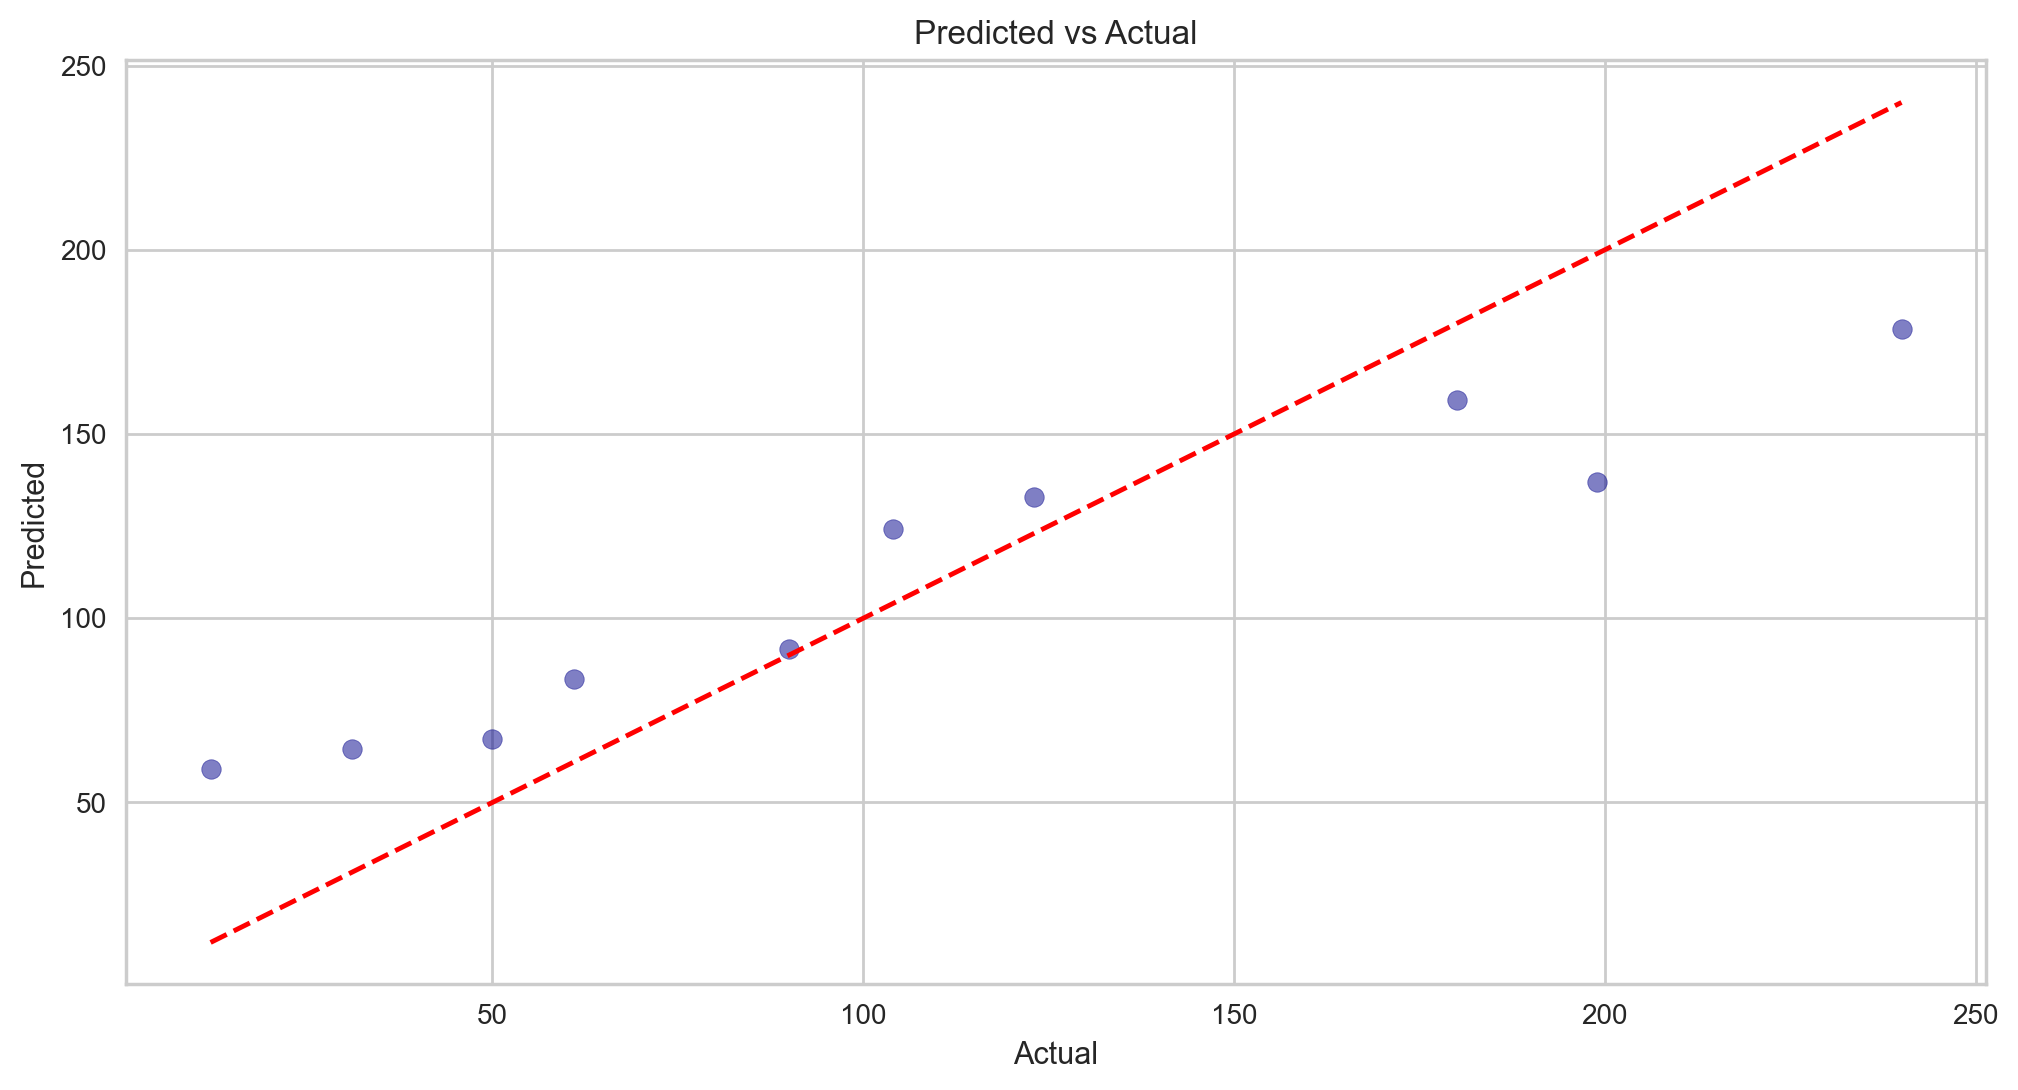

In [62]:
plt.figure(figsize=(12,6), dpi=200)
plt.scatter(y_test_exp, y_pred_exp, color='darkblue', alpha=0.5)
plt.plot([min(y_exp), max(y_exp)], [min(y_exp), max(y_exp)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

## Using SHAP for feature importance

In [71]:
explainer = shap.Explainer(model, X_train, feature_names=X.columns)

In [72]:
shap_values = explainer(X_test)

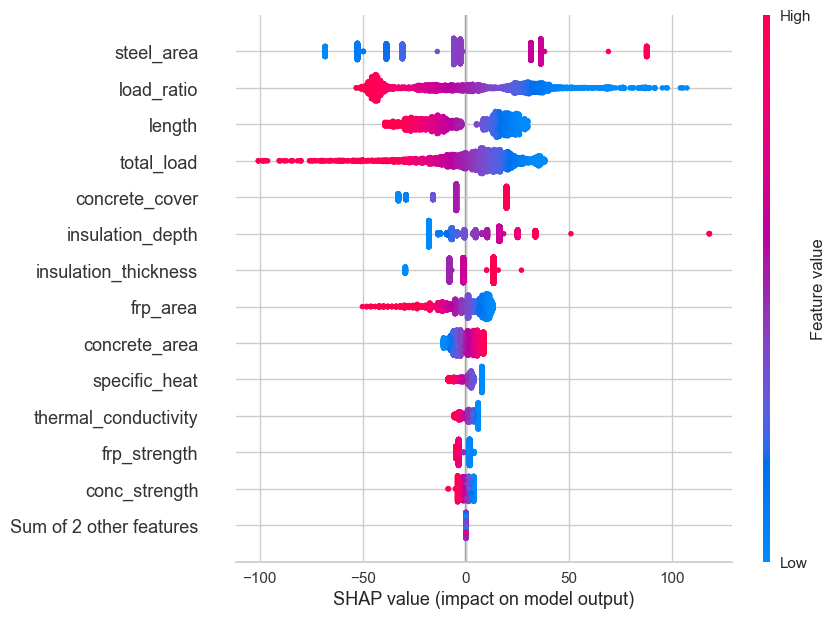

In [73]:
shap.plots.beeswarm(shap_values, max_display=14)

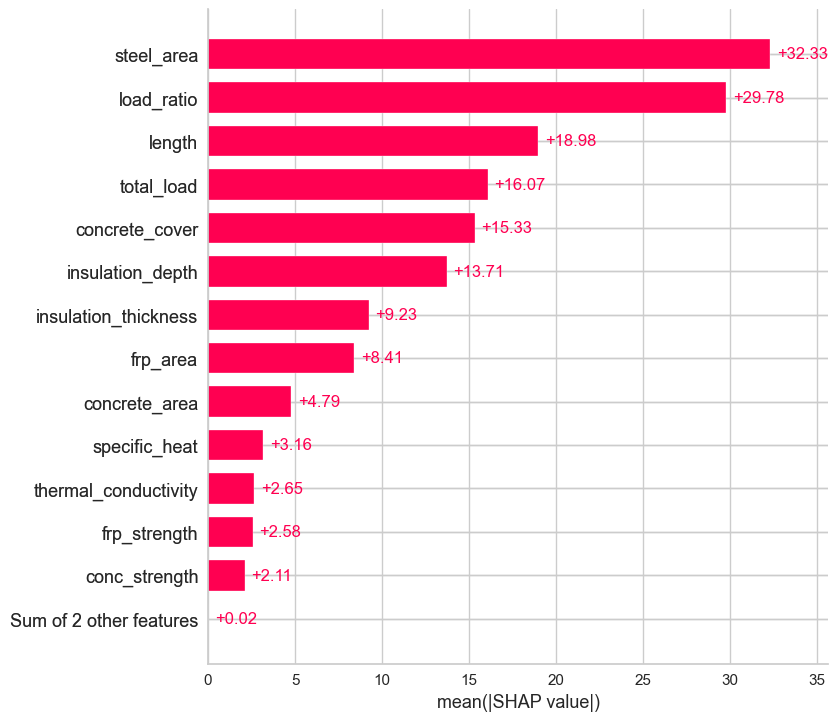

In [74]:
shap.plots.bar(shap_values, max_display=14)

### Linear Regression Top Prediction Errors

In [75]:
diff = np.abs(y_test - y_pred)

results_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Absolute Difference': diff})\
.sort_values('Absolute Difference', ascending=False)

In [76]:
results_lr.head(20)

,Actual,Predicted,Absolute Difference
beam_name,,,
I4_ B1645,20,216.810387,196.810387
I1_ B3787,20,196.962531,176.962531
I1_ B4352,15,186.661929,171.661929
I2_ B3136,15,186.335234,171.335234
I3_ B3575,15,185.925599,170.925599
I4_ B4429,15,177.323398,162.323398
I4_ B3085,15,175.158017,160.158017
I1_ B2572,15,175.147263,160.147263
I4_ B4016,300,141.132223,158.867777


In [77]:
df.loc[results_lr.index].head(20)

,length,concrete_area,concrete_cover,steel_area,frp_area,insulation_thickness,insulation_depth,conc_strength,steel_strength,frp_strength,glass_transition,thermal_conductivity,specific_heat,total_load,load_ratio,fire_resistance
beam_name,,,,,,,,,,,,,,,,
I4_ B1645,4120,140000,38,593.87,121.8,19.0,76.0,28.0,450,966,82,0.082,376000,44.96,44.69,20
I1_ B3787,4060,90000,38,395.91,133.4,38.0,95.0,32.0,421,966,84,0.140,506000,27.43,47.24,20
I1_ B4352,4440,135000,25,854.64,40.8,38.0,75.0,31.0,418,4840,75,0.179,645000,78.78,58.56,15
I2_ B3136,4280,157500,38,593.87,55.2,25.0,38.0,29.0,451,4100,75,0.090,782000,58.46,46.39,15
I3_ B3575,2460,62500,25,213.88,21.6,38.0,62.5,37.0,422,4100,84,0.045,341000,44.33,31.73,15
I4_ B4429,5360,157500,25,593.87,285.6,38.0,62.5,31.0,451,1068,87,0.073,334000,52.98,42.37,15
I4_ B3085,6100,157500,25,854.64,44.2,25.0,0.0,36.0,453,4840,78,0.096,441000,48.61,47.34,15
I1_ B2572,4420,105000,25,593.87,214.2,25.0,62.5,32.0,436,1034,83,0.149,540000,40.08,42.77,15
I4_ B4016,1860,122500,38,379.84,160.0,38.0,76.0,38.0,434,1100,76,0.084,384000,118.03,53.59,300


---